# Logistic Regression

This collab notebook is an introduction to Logistic Regression, comparison to Linear Regression & MLE method

Let's remember what supervised learning is. In essence we want to find an approximation to the function which will map our given input $x$ to given output $y$.

Suppose we have cat and dog pictures and want to have a function which will say if we have given it a picture of a dog or cat. We can represent it numerically as a binary variable (e.g. 0 is dog, 1 is cat)

![alt text](https://miro.medium.com/max/2560/1*biZq-ihFzq1I6Ssjz7UtdA.jpeg)

In this case we have a classification problem, where our output can be only 2 numbers.

We can also have multiple classification task, like in picture below.

![alt text](https://devopedia.org/images/article/172/7316.1561043304.png)

We used Linear Regression when $y$ was continuous, but will it be easily used when y is binary? (we will discuss this below)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
# Randomly generate data containing numbers with more True values as X increases

X = np.linspace(0,1,100).reshape([-1,1])
Y = np.concatenate([np.random.choice([0, 1], size=(50,1), p=[15/16,1/16]),
                    np.random.choice([0, 1], size=(50,1), p=[1/16,15/16])])

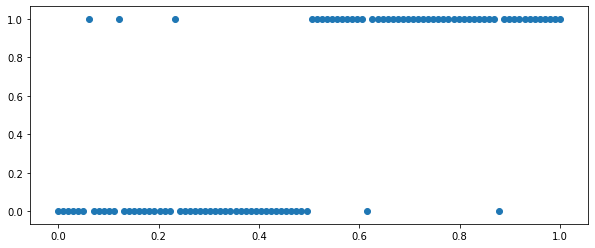

In [0]:
# Plot Y depending on X
plt.figure(figsize = (10,4))
plt.scatter(X,Y)
plt.show()

In [0]:
#Predict Y using simple Linear Regression
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X,Y)
y_hat = ols.predict(X)

The equation for Linear Regression line $\hat{y} = b_0+b_1x_1+b_2x_2+...+b_nx_n$. Coeficients are named differently in literature (sometimes $\theta$, or $w$), thus we will use all of them to get familiar with each notation. For Logistic Regression we will use $\theta$. So our equation in matrix form would be $\hat{Y} = Xθ$, where

$\hat{Y} = \begin{pmatrix}\hat{y}_1\\\hat{y}_2\\.\\.\\.\\\hat{y}_n\end{pmatrix} \quad$
$X = \begin{pmatrix}1&x_{11}&x_{12}&.&.&.&x_{1m}\\1&x_{21}&x_{22}&.&.&.&x_{2m}\\.\\.\\.\\1&x_{n1}&x_{n2}&.&.&.&x_{nm}\end{pmatrix}$
$\quad$
$θ = \begin{pmatrix}θ_0\\θ_1\\θ_2\\.\\.\\.\\θ_n\end{pmatrix}  $





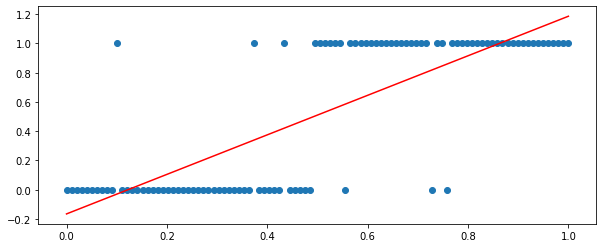

In [0]:
#Plot prediction result with a red line
plt.figure(figsize = (10,4))
plt.scatter(X,Y)
plt.plot(X,y_hat,'r')
plt.show()

Linear regression is used to predict continous variable, but in case of classification it is not the most appropriate modeling technique. For classification a probability of class belonging would be an intuitive thing to obtain. If we consider the ouptut of Linear regression as a probability we will stubmle upon a problem. It can output negative value and values above one. So we need to somehow encapsulate values between 0 and 1. We can do it by putting a sigmoid function over Linear Regression.

$\sigma(z) =1/(1 + e^{-z}$)

$\hat{Y} = \sigma(Xθ)$


$\hat{Y} =\frac{1}{1 + e^{-Xθ}}$

![a;t text](https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba)

### **A warm up exercise:**
### **Show that the derivative of sigmoid is $\sigma(z)(1-\sigma(z))$**

Actually any function that squishes $(-\infty,\infty)$ to $(0,1)$ will work, but using sigmoid has a benefit of nice interpretability.

In [0]:
#Predict Y using Logistic Regression
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='lbfgs')
log.fit(X,Y[:,0])
y_hat_log = log.predict_proba(X)

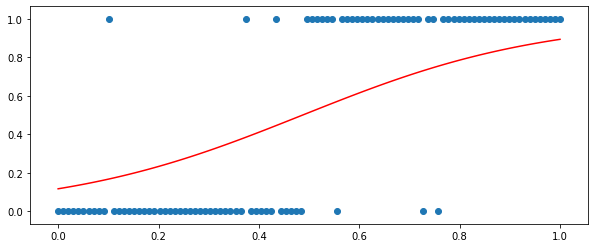

In [0]:
#Plot Logistic Regression prediction result with a red line
plt.figure(figsize = (10,4))
plt.scatter(X,Y)
plt.plot(X,y_hat_log[:,1],'r')
plt.show()

Mean Squared Error $\sum_i(\hat{y}_i-y_i)^2$ is not a convenient metric to optimize for discretized output, as most times the model will struggle to encapsulate values between 0 and 1, thus prolonging fitting time and not fitting the underlying distribution. Thus, we need a metric (loss function) which will inherently do the encapsulation. Cross-entrophy  $\sum_i(y_ilog(\hat{y}_i)+(1-y_i)log(1-\hat{y}_i))$ is usually used for classification tasks, which can be obtained by MLE (Maximum Likelihood Estimator) procedure.

In [0]:
def CE(b0,b1,x,y):
  predictor = b0+b1*x
  s = 1/(1+np.exp(-predictor)) # same as y hat
  return -np.sum(y*np.log(s)+(1-y)*np.log(1-s), axis = 0)

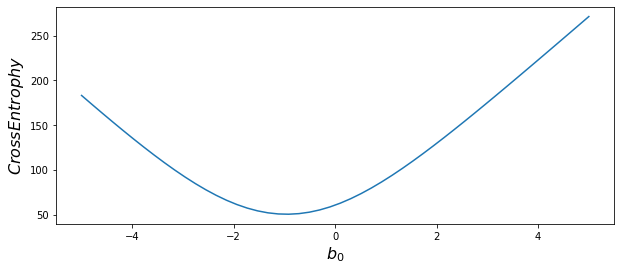

In [0]:
b1 = 2
b0 = np.linspace(-5,5,50)
plt.figure(figsize=(10,4))
plt.plot(b0,CE(b0,b1,X,Y))
plt.xlabel(r'$b_0$', fontsize = 16)
plt.ylabel(r'$CrossEntrophy$', fontsize = 16)
plt.show()

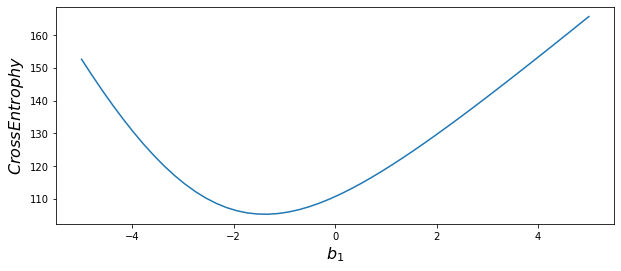

In [0]:
b0 = 2
b1 = np.linspace(-5,5,50)
plt.figure(figsize=(10,4))
plt.plot(b1,CE(b0,b1,X,Y))
plt.xlabel(r'$b_1$', fontsize = 16)
plt.ylabel(r'$CrossEntrophy$', fontsize = 16)
plt.show()

Crossentrophy may seem a little bit complicated but it is actually rather simple. Consider the samples, where $y=1$. 

$$CE = \sum_i(y_ilog(\hat{y}_i)+(1-y_i)log(1-\hat{y}_i))$$
$$CE = \sum_i(1*log(\hat{y}_i)+(1-1)*log(1-\hat{y}_i)),\quad for \quad \{i,y_i = 1\}$$
$$CE = \sum_i(log(\hat{y}_i)+0*log(1-\hat{y}_i)),\quad for \quad \{i,y_i = 1\}$$
$$CE = \sum_ilog(\hat{y}_i),\quad for \quad \{i,y_i = 1\}$$

And consider the samples where $y=0$.

$$CE = \sum_i(y_ilog(\hat{y}_i)+(1-y_i)log(1-\hat{y}_i))$$
$$CE = \sum_i(0*log(\hat{y}_i)+(1-0)*log(1-\hat{y}_i)),\quad for \quad \{i,y_i = 0\}$$
$$CE = \sum_ilog(1-\hat{y}_i),\quad for \quad \{i,y_i = 0\}$$


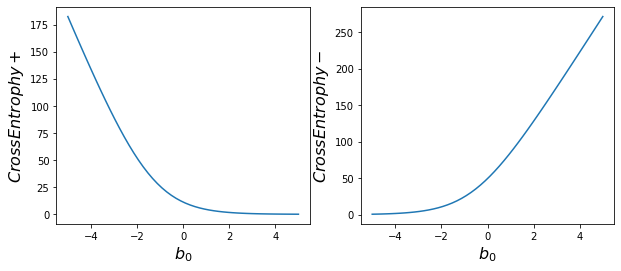

In [0]:
# Plotting different components of crossentrophy
b1 = 2
b0 = np.linspace(-5,5,50)

Y_1 = np.where(Y==1)
Y_0 = np.where(Y==0)
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(b0,CE(b0,b1,X[Y_1].reshape(-1,1),Y[Y_1].reshape(-1,1)))
axes[0].set_xlabel(r'$b_0$', fontsize = 16)
axes[0].set_ylabel(r'$CrossEntrophy+$', fontsize = 16)
axes[1].plot(b0,CE(b0,b1,X[Y_0].reshape(-1,1),Y[Y_0].reshape(-1,1)))
axes[1].set_xlabel(r'$b_0$', fontsize = 16)
axes[1].set_ylabel(r'$CrossEntrophy-$', fontsize = 16)
plt.show()

## MLE

The idea behind MLE is to select a model which maximizes the probability that the given data is generated via that model.



In general the Likelihood function is constructiong by multyplying the likelihoods of each point (pdf, which depends on parameter $\theta$) together.

$$L = \prod\limits_{i}f(x;\theta)_i$$

By maximizing the Likelihood function , we are trying to find a distribution (by tweaking $\theta$), which will be the msot probable distrubtion from which our data is coming from.

![alt text](https://pmirla.github.io/assets/mle/mle_econometrics_2.png) 

So to use MLE method for Logistic Regression, we should have calcualte pdf (likelihood) according to our model at each point. 

So the Likelihood Function for Logistic will have the follwoing form.
$$L = \prod\limits_{i}p_i^{y_i}(1-p_i)^{1-y_i}$$, where $p_i = P(y_i = 1 | x_i )$, where $i$ is iteration through the observations.

Now let's compute logarithm of our equation, which will transform a product of densities into a sum, in order to easily compute its derivatives later. (Note that as logarithm is a monotinic transformation, the maximum will stay the same.
 
$$log(L) =  log(\prod\limits_{i}p_i^{y_i}(1-p_i)^{1-y_i})$$
$$log(L) =  \sum\limits_{i}log(p_i^{y_i}(1-p_i)^{1-y_i})$$
$$log(L) =  \sum\limits_{i}[log(p_i^{y_i})+log((1-p_i)^{1-y_i})]$$
$$log(L) =  \sum\limits_i[y_ilog(p_i) + (1-y_i)log(1-p_i)]$$

$$log(L) =  \sum\limits_i[y_ilog(\sigma(x_iθ)) + (1-y_i)log(1-\sigma(x_iθ))]\quad Doesn't\space this\space look\space familiar?$$

Now that we have a function for log-likelihood, we need to calculate derivative of the function with respect to $θ$.

$$\frac{∂log(L(θ))}{∂θ_j}= \frac{∂}{∂θ_j}\sum\limits_i[y_ilog(\sigma(x_iθ)) + (1-y_i)log(1-\sigma(x_iθ))]$$
$$\frac{∂log(L(θ))}{∂θ_j}= \sum\limits_i[\frac{∂}{∂θ_j}y_ilog(\sigma(x_iθ))] + \sum\limits_i[\frac{∂}{∂θ_j}(1-y_i)log(1-\sigma(x_iθ))]$$

$$\frac{∂log(L(θ))}{∂θ_j}= \sum\limits_i[\frac{y_i}{\sigma(x_iθ)}\frac{∂}{∂θ_j}(\sigma(x_iθ))] + \sum\limits_i[\frac{1-y_i}{1-\sigma(x_iθ)}\frac{∂}{∂θ_j}(1-\sigma(x_iθ))]$$

(Let's remember that the derivative of the sigmoid is $\frac{d}{dz}\sigma(z)=\sigma(z)(1−\sigma(z))$ )

$$\frac{∂log(L(θ))}{∂θ_j}= \sum\limits_i[\frac{y_i}{\sigma(x_iθ)}\sigma(x_iθ)(1-\sigma(x_iθ))x_{ij}] + \sum\limits_i[-\frac{1-y_i}{1-\sigma(x_iθ)}\sigma(x_iθ)(1-\sigma(x_iθ))x_{ij}]$$

$$\frac{∂log(L(θ))}{∂θ_j}= \sum\limits_i[y_i(1-\sigma(x_iθ))x_{ij}] + \sum\limits_i[-(1-y_i)\sigma(x_iθ)x_{ij}]$$

$$\frac{∂log(L(θ))}{∂θ_j}= \sum\limits_i[x_{ij}(y_i-y_i\sigma(x_iθ) - \sigma(x_iθ) + y_i\sigma(x_iθ))]$$

$$\frac{∂log(L(θ))}{∂θ_j}= \sum\limits_ix_{ij}(y_i - \sigma(x_iθ))$$


As MLE doens't have closed form solution in Logistic Regression case, we need to use some numerical algorithms to compute the derivatives.

Below are listed the workings some of numerical algorithms on a high level.

## Newton’s Method

$θ_j^{new} = θ_j^{old} - \frac{L'(θ_j^{old})}{L''(θ_j^{old})} $

First choose an initial value θ, then proceeds iteratively to refine that estimate with a sequence of better estimates, and for multivariate case use The Hessian matrix which is a square matrix of second-order partial derivatives of order n x n.

$θ^{new} = θ^{old} - H^{-1}_{ℓ(θ̂)} * L'(θ^{old}) $

But it’s computationally expensive because of the second partial derivative calculation

## Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm (L-BFGS)

It's similar to Newton's method but here We use an estimation to the inverse Hessian matrix based on differences of gradients over several iterations. The advantage of L-BFGS is that is requires only retaining the most recent m gradients.

If dataset is small it performs the best compared to the other methods, but sometimes it may not converge to anything.


## Large Linear Classification

Uses a coordinate descent algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes. It's recommended for solving large-scale classification problems.

## Gradient Descent

$$\theta_{new} = \theta_{old}-\alpha*L'_\theta$$,
where $\alpha$ is the learning rate, which is handpicked not estimated

![alt text](https://miro.medium.com/max/1005/1*_6TVU8yGpXNYDkkpOfnJ6Q.png)

![alt text](https://suniljangirblog.files.wordpress.com/2018/12/1-1.gif?w=640)

## Logistic Regression - Result Interpretation

##### The signs of the coefficients
The sign of $x_1$ coefficient is positive. A positive sign means that all else being equal, as $x_1$'s value increases - the probability of positive outcome rises, and the reverse happens in case of negative sign of a coefficient.

##### The magnitude of the coefficients
We can also compare coefficients in terms of their magnitudes, $x_1$ & $x_2$ have the same shape, so they are perfect candidates for comparison.

As you see the absolute value of $x_1$'s coefficient is larger than $x_2$'s, that means that $x_1$ has more impact on model's output than $x_2$, that makes sense because $x_2$ is a set of random numbers unlike $x_1$, what's order is very similar to the $y$'s order.

Because sigmoid function's coefficients are not interpretable, let's compute their odds, which is the ratio of probabilities $odds = \frac{p}{1-p}$( how many more times is likely that Positive Event will happen compared to Negative Event where $P(negative) = 1-P(positive)$ )

$p = \frac{1}{1+e^{-(b_0 + b_1x1 + b_2x2)}} = \frac{e^{b_0 + b_1x1 + b_2x2}}{1+e^{b_0 + b_1x1 + b_2x2}}$

$1-p = \frac{1}{1+e^{b_0 + b_1x1 + b_2x2}}$

$\frac{p}{1-p} = e^{b_0 + b_1x1 + b_2x2}$


In order to see the real impact of e.g. $b_1$ coefficient, we should compute odds ratio with different values of $x1$, meanwhile keeping other variables constant.
So let's divide odds where $x_1$ is set to 1 to odds where $x_1$ is set to 0. 

$ \frac{odd_{given|x_1=1|}}{odd_{given|x_1=0|}} = \frac{e^{b_0 + b_11 + b_2x2}}{e^{b_0 + b_10 + b_2x2}} = \frac{e^{b_0 + b_1 + b_2x2}}{e^{b_0 + b_2x2}} = e^{b_0 + b_1 + b_2x2 - b_0 -b_2x2} = e^{b_1}$


That means that a unit change in $x_1$ (other variables kept constant) results in a "$e^{b_1}$" change in the odds, in our case $e^{3.2429}=25.6$ and a unit change in $x_1$ raises probability of success over failure 25.6 times.


Now Let's go with a more practical example and use Logistic Regression for predicting survival on Titanic

In [0]:
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [0]:
# Download the Titanic dataset from Kaggle & Load it

path = 'dataset/'
df=pd.read_csv(path+'train.csv')

In [0]:
# Plot first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


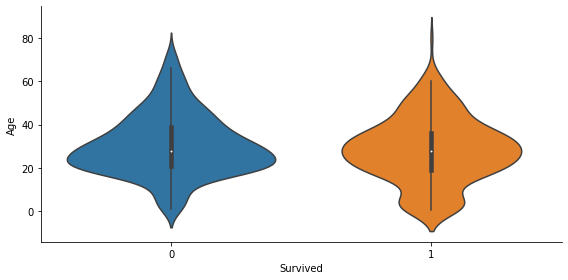

In [0]:
#Plot number of survivors & victims based on age
sns.catplot(y="Age", x = 'Survived', kind ='violin', data=df, size = 4, aspect = 2)

In [0]:
#filter and leave only those rows for which age is known
df = df.loc[pd.notnull(df['Age'])]

#Prepare data to predict Survival based on Age
x=df[['Age']]
y=df['Survived']

In [0]:
import statsmodels.api as sm
sm_model = sm.Logit(y,sm.add_constant(x))
res = sm_model.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: Survived         AIC:              964.2284
Date:               2019-11-09 08:10 BIC:              973.3702
No. Observations:   714              Log-Likelihood:   -480.11 
Df Model:           1                LL-Null:          -482.26 
Df Residuals:       712              LLR p-value:      0.038392
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
const   -0.0567     0.1736   -0.3268   0.7438   -0.3969    0.2835
Age     -0.0110     0.0053   -2.0570   0.0397   -0.0214   -0.0005



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Age's coefficient is -0.011, and as we remember from the previous example, to compute the real impact of $x_1$ (in this example $x_1$ is the Age), we should calculate $e^{b_1} = e^{-0.011}≈0.989$. This means that an increase in Age by 1 year results 0.989 times decrease of survival odds. So according to our model younger people had higher survival chance than old ones

We can also compute the survival odd changes between people with e.g. 5 years difference. Let's compare survival odds' ratio of 6 & 1 year old kids and keep other variables constant: $e^{b_16-b_11} = e^{b_1*5} = e^{-0.011*5} ≈ 0.946$. This means if we have 2 persons with 5 year difference in age, than the older one has $0.946$ * _the chance of survival of young one_.

# Exercise

Download the mushroom data, fit Logistic regression, try different combinations of features, to see which model is the best fit, interpret the results.
https://www.kaggle.com/uciml/mushroom-classification

In [0]:
from google.colab import files

uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [0]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [0]:
df = pd.read_csv('mushrooms.csv')

In [0]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
df["class"] = [1 if i == "p" else 0 for i in df["class"]]

# Dropping "veil-type" column.
df.drop("veil-type", axis=1, inplace=True)

In [0]:
for column in df.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(df[column].unique())-1)
    for i in df[column].unique():
        df[column] = [value if letter == i else letter for letter in df[column]]
        value += step

In [0]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.125,0.4,0.166667


In [0]:
df = df.loc[pd.notnull(df['class'])]
y = df['class']
X = df.drop(['class', 'gill-spacing', 'gill-size',
             'stalk-surface-below-ring', 'stalk-color-below-ring', 'ring-type'] , axis  = 1)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [0]:
vif

,VIF Factor,features
0,2.215428,cap-shape
1,2.949624,cap-surface
2,2.544999,cap-color
3,6.603618,bruises
4,20.851829,odor
5,4.112496,gill-attachment
6,8.983490,gill-color
7,4.613750,stalk-shape
8,14.891600,stalk-root
9,3.273955,stalk-surface-above-ring


In [0]:
import statsmodels.api as sm
lr = sm.Logit(y, X)
res = lr.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.222033
         Iterations 8
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.679    
Dependent Variable:     class                AIC:                  3639.5929
Date:                   2019-11-09 09:22     BIC:                  3751.6342
No. Observations:       8124                 Log-Likelihood:       -1803.8  
Df Model:               15                   LL-Null:              -5625.9  
Df Residuals:           8108                 LLR p-value:          0.0000   
Converged:              1.0000               Scale:                1.0000   
No. Iterations:         8.0000                                              
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
cap-s